## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=0.8, random_state=3,
                        n_redundant=0)  # Fix the 'n_redundant' parameter to be an integer
]


In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

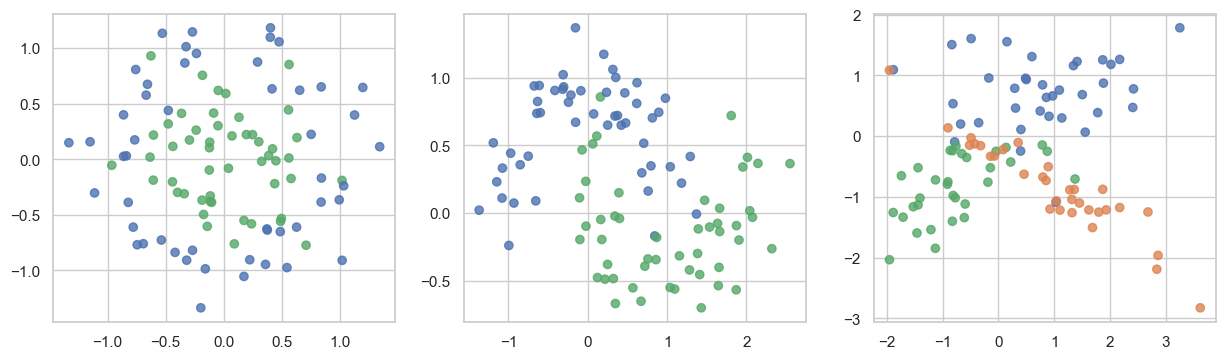

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

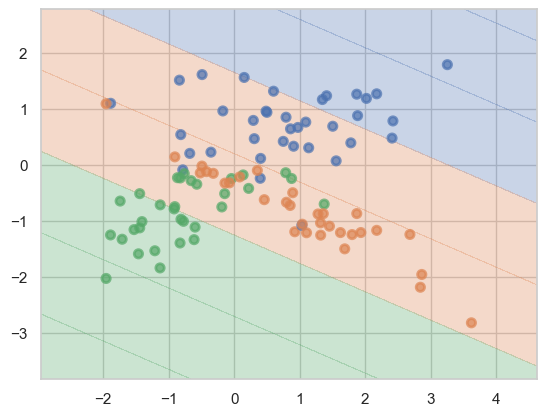

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Обучающая выборка: 1.0
Тестовая выборка: 0.7333333333333333

Обучающая выборка: 1.0
Тестовая выборка: 0.9

Обучающая выборка: 1.0
Тестовая выборка: 0.8



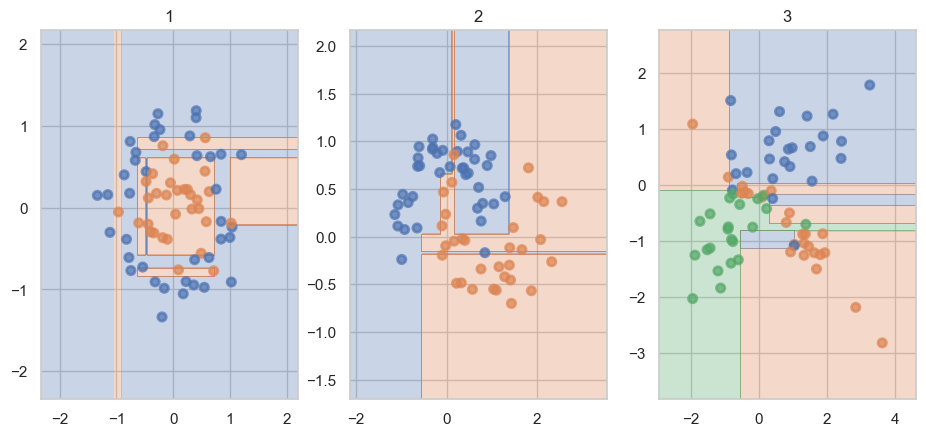

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(10, 5))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=25)
    tree = DecisionTreeClassifier().fit(x_train, y_train)
    
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title(i+1)
    
    print('Обучающая выборка:', tree.score(x_train, y_train))
    print('Тестовая выборка:', tree.score(x_test, y_test))
    print()

_Ответ:_
Правильно, когда точность модели на обучающей выборке близка к 1, а на тестовой выборке значительно ниже, это свидетельствует о переобучении модели.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Обучающая выборка: 1.0
Тестовая выборка: 0.8

Обучающая выборка: 1.0
Тестовая выборка: 0.9

Обучающая выборка: 1.0
Тестовая выборка: 0.8



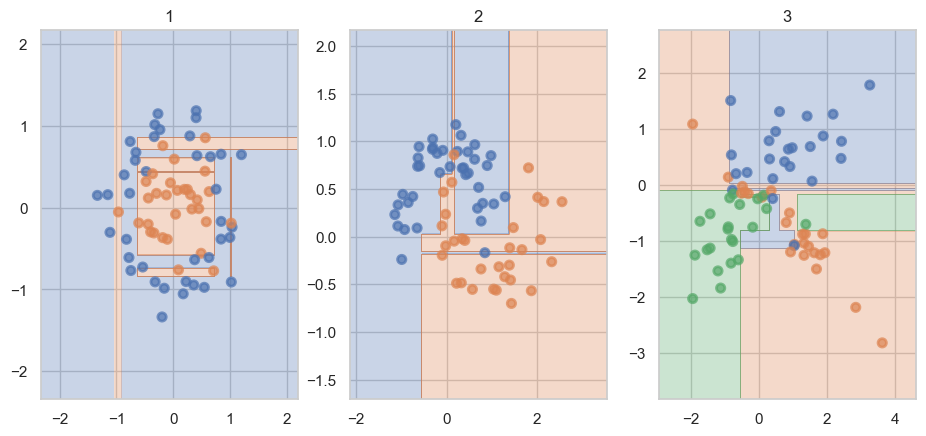

In [8]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(10, 5))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=25)
    tree = DecisionTreeClassifier(max_depth = 24).fit(x_train, y_train)
    
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title(i+1)
    
    print('Обучающая выборка:', tree.score(x_train, y_train))
    print('Тестовая выборка:', tree.score(x_test, y_test))
    print()

Обучающая выборка: 0.7
Тестовая выборка: 0.7

Обучающая выборка: 0.9142857142857143
Тестовая выборка: 0.9

Обучающая выборка: 0.8857142857142857
Тестовая выборка: 0.8666666666666667



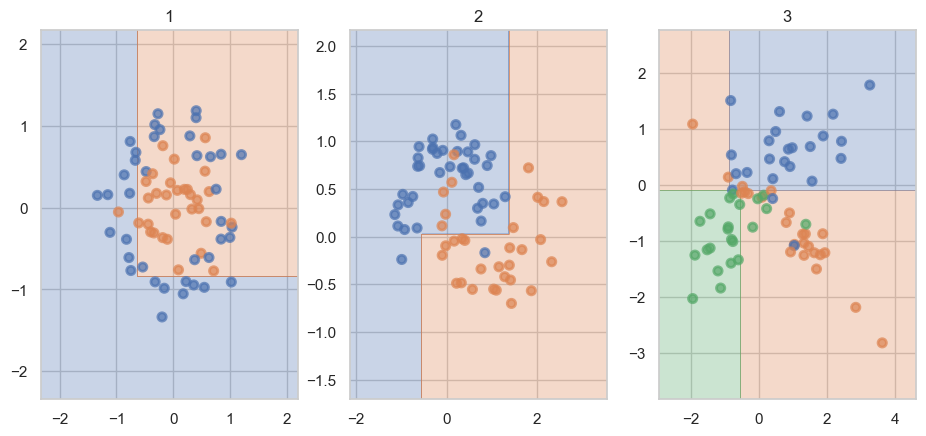

In [9]:
plt.figure(figsize=(10, 5))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=25)
    tree = DecisionTreeClassifier(max_depth = 2).fit(x_train, y_train)
    
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title(i+1)
    
    print('Обучающая выборка:', tree.score(x_train, y_train))
    print('Тестовая выборка:', tree.score(x_test, y_test))
    print()

Обучающая выборка: 0.9571428571428572
Тестовая выборка: 0.8

Обучающая выборка: 0.9571428571428572
Тестовая выборка: 0.8333333333333334

Обучающая выборка: 0.9285714285714286
Тестовая выборка: 0.8333333333333334



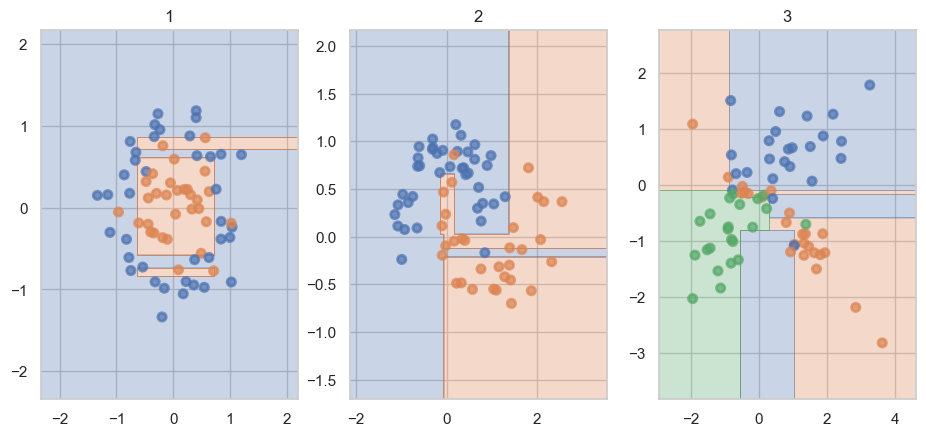

In [10]:
plt.figure(figsize=(10, 5))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=25)
    tree = DecisionTreeClassifier(min_samples_leaf = 2).fit(x_train, y_train)
    
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title(i+1)
    
    print('Обучающая выборка:', tree.score(x_train, y_train))
    print('Тестовая выборка:', tree.score(x_test, y_test))
    print()

Обучающая выборка: 0.6
Тестовая выборка: 0.5666666666666667

Обучающая выборка: 0.8142857142857143
Тестовая выборка: 0.8333333333333334

Обучающая выборка: 0.6285714285714286
Тестовая выборка: 0.7333333333333333



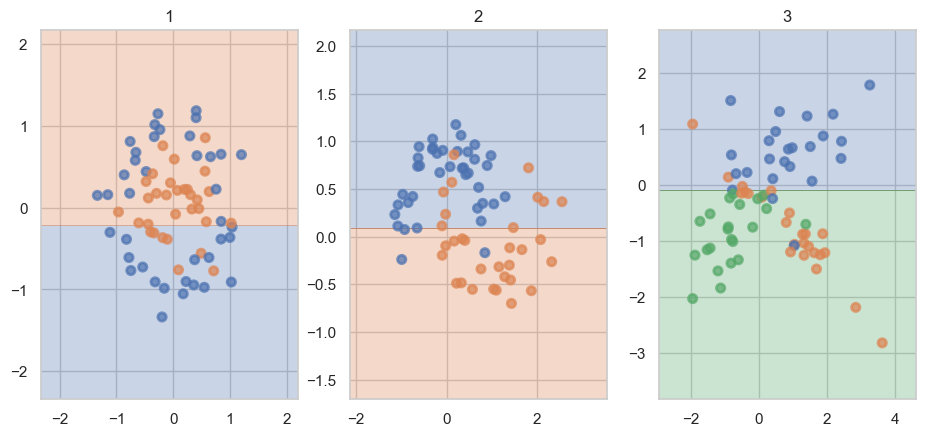

In [11]:
plt.figure(figsize=(10, 5))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=25)
    tree = DecisionTreeClassifier(min_samples_leaf = 24).fit(x_train, y_train)
    
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title(i+1)
    
    print('Обучающая выборка:', tree.score(x_train, y_train))
    print('Тестовая выборка:', tree.score(x_test, y_test))
    print()


__Ответ:__
В разных ситуациях наблюдаются разные изменения: в некоторых случаях оценки значительно уменьшились, в то время как в других случаях они увеличились. Тем не менее, общая тенденция заключается в том, что во всех случаях точность на обучающей выборке перестала быть равной 1, что свидетельствует об ослаблении влияния переобучения.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
students = pd.read_excel('Students.xlsx')
students

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


In [13]:
Y = students[' UNS']
X = students.drop(columns = ' UNS')

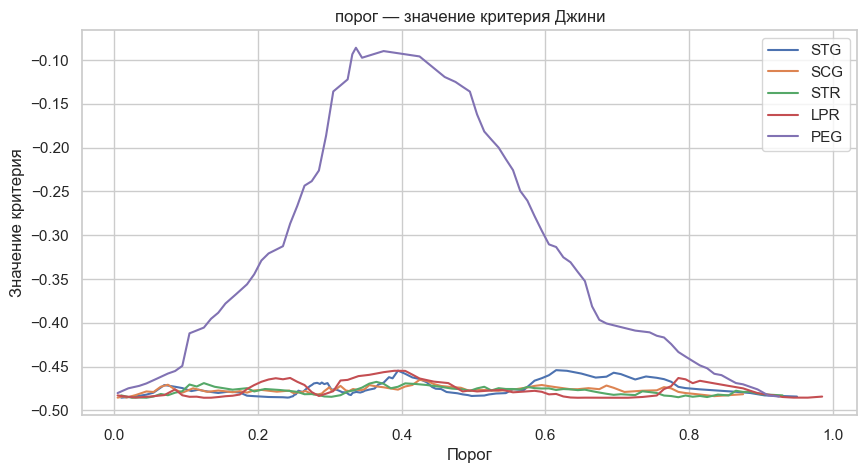

In [14]:
from hw5code import find_best_split
plt.figure(figsize=(10, 5))
plt.title('порог — значение критерия Джини')
plt.xlabel('Порог')
plt.ylabel('Значение критерия')

for column in X.columns:
    threshold, ginis, threshold_best, gini_best = find_best_split(X[column].values, Y.values)
    plt.plot(threshold, ginis, label=column)
plt.legend()

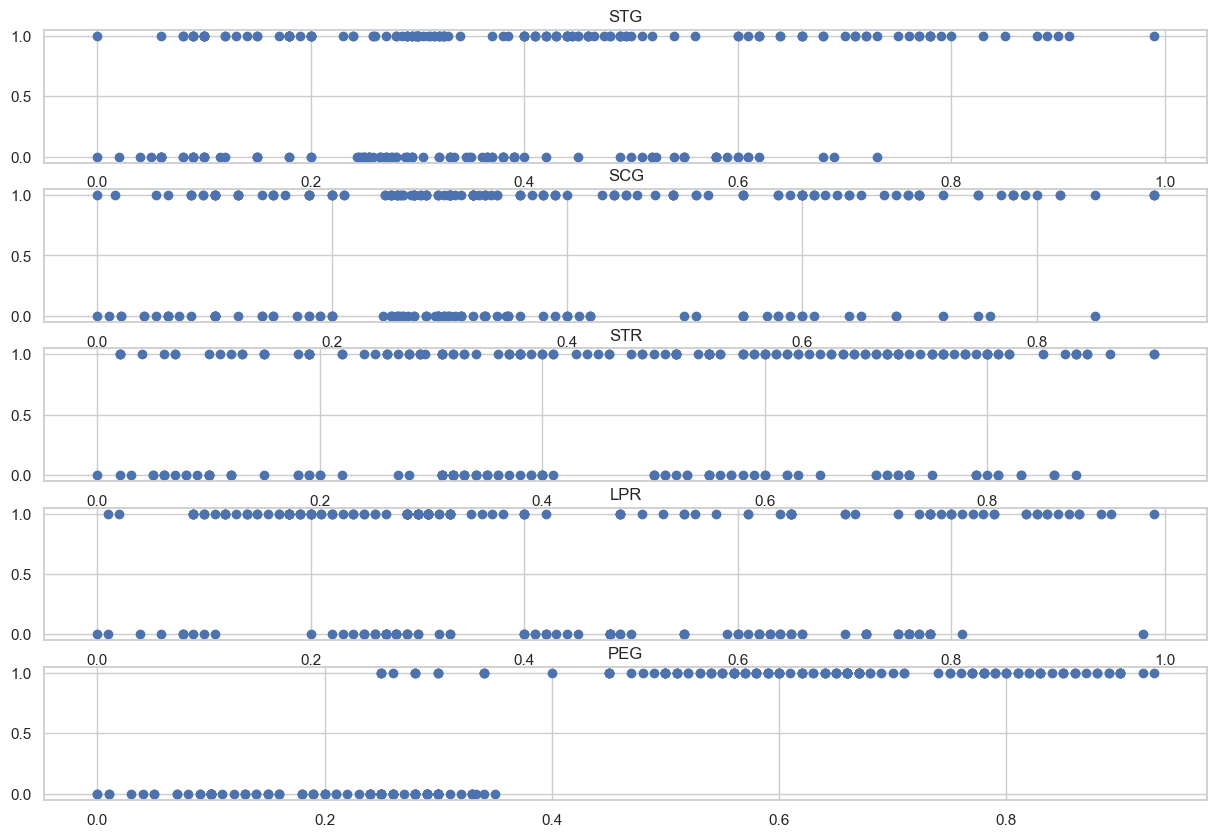

In [15]:
plt.figure(figsize=(15, 10))
for i, column_name in enumerate(X.columns):
    plt.subplot(5, 1, i + 1)
    plt.scatter(X[column_name].values, Y.values)
    plt.title(column_name)

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
Лучший параметр для разделения - PEG.

Графики согласуются друг с другом, потому что в обоих случаях точки разделяются примерно в районе 0,4.

Форма кривой для "хороших" параметров напоминает параболу, что означает наличие экстремума для разделения. Другие параметры имеют почти прямую форму, что говорит о том, что значение критерия Джини примерно одинаково для всех порогов.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [16]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
mushrooms = pd.read_csv('agaricus-lepiota.data')
mushrooms

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from hw5code import DecisionTree

for column in mushrooms.columns:
    LE = LabelEncoder()
    mushrooms.loc[:, column] = LE.fit_transform(mushrooms.loc[:, column])
    
Y = mushrooms['p']
X = mushrooms.drop(columns='p')
x_train, x_test, y_train, y_test = train_test_split(X.values, Y.values, test_size=0.5, random_state=36)

X_types = ['categorical' for x in x_train]
tree = DecisionTree(X_types)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print('test accuracy =', np.sum(y_pred == y_test) / np.size(y_test))
y_pred = tree.predict(x_train)
print('train accuracy =', np.sum(y_pred == y_train) / np.size(y_train))
print('depth =', tree.depth)

test accuracy = 0.999015263417036
train accuracy = 1.0
depth = 7


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [19]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
tic_tac_toe = pd.read_csv('tic-tac-toe.data')
cars = pd.read_csv('car.data')
nursery = pd.read_csv('nursery.data')
tic_tac_toe
  

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


In [20]:
cars

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [21]:
cars["unacc"][cars["unacc"] == 'unacc'] = "acc"
cars["unacc"][cars["unacc"] == 'vgood'] = "good"


In [22]:
nursery

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
...,...,...,...,...,...,...,...,...,...
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12956,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [34]:
nursery["recommend"][nursery["recommend"] == 'not_recom'] = "recommend"
nursery["recommend"][nursery["recommend"] == 'very_recom'] = "priority"
nursery["recommend"][nursery["recommend"] == 'spec_prior'] = "priority"

In [42]:
def task15(X, Y):
    result = {}
    result['real'] = [cross_val_score(DecisionTree(['real' for x in X.columns]), 
                                           X.values, Y, cv=10, scoring="accuracy").mean()]
    result['categorical'] = [cross_val_score(DecisionTree(['categorical' for x in X.columns]), 
                                          X.values, Y, cv=10, scoring="accuracy").mean()]
    feat_one_hot = OneHotEncoder(sparse=False).fit_transform(X)
    result['real + one-hot-encoding'] = [cross_val_score(DecisionTree(['real'] * feat_one_hot.shape[1]), 
                                                feat_one_hot, Y, cv=10, scoring="accuracy").mean()]
    result['sklearn'] = [cross_val_score(DecisionTreeClassifier(), X.values, Y, cv=10,
                                              scoring="accuracy").mean()]
    return result


In [43]:
data_list = [mushrooms, tic_tac_toe, cars, nursery]
for dataset in data_list:
    for colums in dataset.columns:
        LE = LabelEncoder()
        dataset.loc[:, colums] = LE.fit_transform(dataset.loc[:, colums])
        

In [44]:
X_rows = ['mushrooms', 'tic_tac_toe', 'cars', 'nursery']
Y_columns = ['real', 'categorical', 'real + one-hot-encoding', 'sklearn']

X = []
Y = []

X.append(mushrooms.drop(columns='p'))
X.append(tic_tac_toe.drop(columns='positive'))
X.append(cars.drop(columns='unacc'))
X.append(nursery.drop(columns='recommend'))

Y.append(mushrooms['p'].values)
Y.append(tic_tac_toe['positive'].values)
Y.append(cars['unacc'].values)
Y.append(nursery['recommend'].values)


In [45]:
answer = pd.DataFrame(columns=Y_columns)
for i in range(4):
    tasks = task15(X[i], Y[i])
    tasks['name'] = X_rows[i]
    answer = answer.append(tasks, ignore_index=True)
answer.set_index('name')

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 959, in fit
    super()._fit(
  File "/usr/local/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 284, in _fit
    check_classification_targets(y)
  File "/usr/local/lib/python3.11/site-packages/sklearn/utils/multiclass.py", line 215, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**